In [4]:
import numpy as np
import pandas as pd
import Mongo_Connector as mongo
import tlsh
from icecream import ic
import matplotlib.pyplot as plt
import ssdeep
import warnings
from concurrent.futures import ThreadPoolExecutor
from itertools import combinations
import concurrent.futures
warnings.filterwarnings('ignore')
db = mongo.init("portainer", port=32768)
df = pd.DataFrame(list(db["malware"].find({})))

(0.0, 40.0)

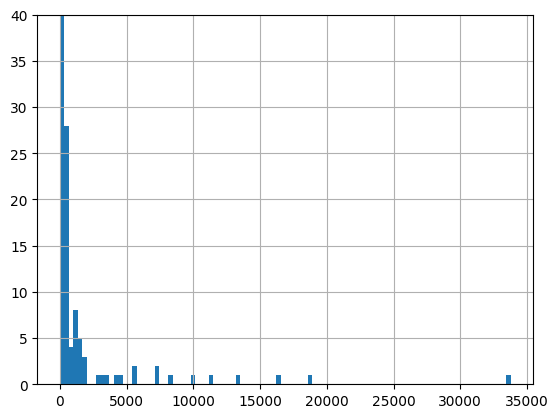

In [5]:
family_counts = df['family'].value_counts()

# Filter the families with more than one entry
malware_filtered = df[df['family'].map(family_counts) > 1]
malware_filtered = malware_filtered.dropna()
family_counts.hist(bins=100)
plt.ylim(0, 40)

In [6]:
df

,_id,family,SHA256,file_size,ssdeep,sdhash,tlsh,machoc,strings,machoke
0,6563776f3624482ac9d197e3,9002Rat,006c74c6813a6efeabea860b2718ed548eed216a319d76...,66888,{'ssdeep': '1536:fyOinfXrmThthYvYh+8+IXbTyllRb...,sdhash hash,{'tlsh': 'T18A635B27E9548473CDC24DB044E80B7B8A...,Machoc hash,{'strings': 'T1E212E7DB1104D5268DC716B2880B19E...,{'machoke': '526cb6c74b6b4fe4ab698f6a149c2da4a...
1,6563776f3624482ac9d197e4,9002Rat,0414ffdf9dcf32061cc57d0b54bf4410c1c588258c1261...,91136,{'ssdeep': '1536:isQQjCC6ZRC5EPviVkdsayrPJe7P6...,sdhash hash,{'tlsh': 'T1D9937B107682C275D47A29344C69CB731B...,Machoc hash,{'strings': 'T153E14A15A8F899E35597838855607B8...,{'machoke': 'c21014d561f4751fdaa6af077e8d16e1a...
2,6563776f3624482ac9d197e5,9002Rat,054ac444bb2e4fa836ecb6ecdbb9381001ab26cf109451...,20008392,{'ssdeep': '393216:1ZZNprQxrpbXZRCb0g/6cGx3PjW...,sdhash hash,{'tlsh': 'T14217331276D2C037C1A711719A37EB29AA...,Machoc hash,{'strings': 'T1865523536490B4B9B1EB478206F3A75...,"{'machoke': 'MNULL', 'hash_time': 0}"
3,6563776f3624482ac9d197e6,9002Rat,06fb64ebe50ee96901a339a7c5f686ead86e2ed6b26a73...,13189815,{'ssdeep': '393216:z0ZCif89tnKfsp09SskycXZBBLW...,sdhash hash,{'tlsh': 'T192D6336519E01E8CF2D177765AB1A2D44F...,Machoc hash,{'strings': 'T1401533932CF134146066EBB64D4FBCA...,{'machoke': 'fc420b141a25c1e87bff906654371d173...
4,6563776f3624482ac9d197e7,9002Rat,07da10375b0862760f3cb84e563f74ff4fc53864e34836...,21415252,{'ssdeep': '393216:c5gt4ljF2jF0C0eUkGz2Wqha9zO...,sdhash hash,{'tlsh': 'T16827339FB8735437E78CE4F089FA77F202...,Machoc hash,{'strings': 'T107653373A5E073D133E792E3A6CBEB5...,{'machoke': '9afe7f481a25c1e87bff906697df084cc...
...,...,...,...,...,...,...,...,...,...,...
208641,658f24555f823237b2e23b36,zxShell,fbe294910ef833e1c9b2c8663c06b6ef99c13b2bc5eb01...,1698208,NaN,NaN,NaN,NaN,{'strings': 'T173F301867C0624D5EBFFAEDB4D3A703...,NaN
208642,658f24555f823237b2e23b37,zxShell,fc3cacb2103adedc11720c34a243de58085c1a7283ba35...,204240,NaN,NaN,NaN,NaN,{'strings': 'T1BF62AFC75196B9D08B8A8F92E752A05...,NaN
208643,658f24555f823237b2e23b38,zxShell,dbd03093e58c2d60f4f47b720691cd3e6310f0566403ee...,1343952,NaN,NaN,NaN,NaN,{'strings': 'T1425302C618D220E6EF92DA1C95AB778...,NaN
208644,658f24555f823237b2e23b39,zxShell,e2d2761fc2535d99527df2f7cffd8dddccd504dc0096f6...,1181088,NaN,NaN,NaN,NaN,{'strings': 'T167B3E1E1659228B103A6CF4D5AE7770...,NaN


In [7]:
original_count = df.shape[0]

# Count the occurrences of each family
family_counts = df['family'].value_counts()

# Filter the DataFrame to keep families with more than one entry
malware_filtered = df[df['family'].map(family_counts) > 1]

# Get the new number of rows after filtering
filtered_count = malware_filtered.shape[0]

# Identify the families that were removed
removed_families = family_counts[family_counts == 1].index.tolist()

# Print the results
print(f"Original DataFrame had {original_count} rows.")
print(f"Filtered DataFrame has {filtered_count} rows.")
print(f"Families removed (only had 1 entry): {removed_families}")

Original DataFrame had 208646 rows.
Filtered DataFrame has 208644 rows.
Families removed (only had 1 entry): ['CyclopsBlink', 'Darkbit']


([], [])

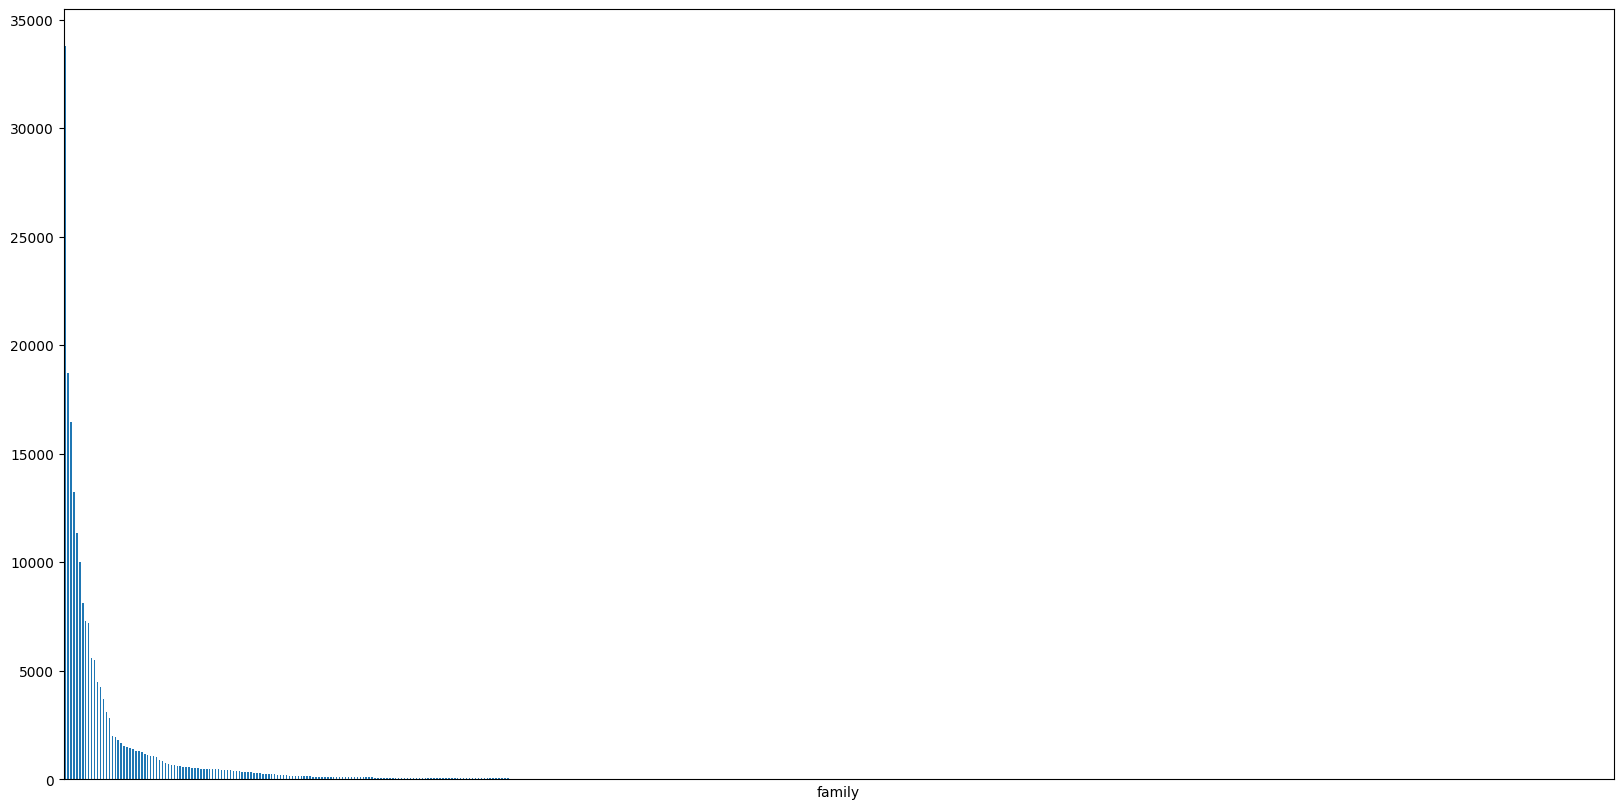

In [8]:
malware_filtered["family"].value_counts().plot(x="family", y="count", kind="bar", figsize=(20, 10))
plt.xticks([])

In [9]:
len(df["family"].unique())

527

In [10]:
malware_filtered["scicore"] = False
size = malware_filtered.shape[0] / 20
scicore = pd.DataFrame(list(db["scicore"].aggregate([{"$sample": {"size": size}}])))
scicore["scicore"] = True

malware_concat = pd.concat([malware_filtered, scicore])

malware_concat

,_id,family,SHA256,file_size,ssdeep,sdhash,tlsh,machoc,strings,machoke,scicore
0,6563776f3624482ac9d197e3,9002Rat,006c74c6813a6efeabea860b2718ed548eed216a319d76...,66888,{'ssdeep': '1536:fyOinfXrmThthYvYh+8+IXbTyllRb...,sdhash hash,{'tlsh': 'T18A635B27E9548473CDC24DB044E80B7B8A...,Machoc hash,{'strings': 'T1E212E7DB1104D5268DC716B2880B19E...,{'machoke': '526cb6c74b6b4fe4ab698f6a149c2da4a...,False
1,6563776f3624482ac9d197e4,9002Rat,0414ffdf9dcf32061cc57d0b54bf4410c1c588258c1261...,91136,{'ssdeep': '1536:isQQjCC6ZRC5EPviVkdsayrPJe7P6...,sdhash hash,{'tlsh': 'T1D9937B107682C275D47A29344C69CB731B...,Machoc hash,{'strings': 'T153E14A15A8F899E35597838855607B8...,{'machoke': 'c21014d561f4751fdaa6af077e8d16e1a...,False
2,6563776f3624482ac9d197e5,9002Rat,054ac444bb2e4fa836ecb6ecdbb9381001ab26cf109451...,20008392,{'ssdeep': '393216:1ZZNprQxrpbXZRCb0g/6cGx3PjW...,sdhash hash,{'tlsh': 'T14217331276D2C037C1A711719A37EB29AA...,Machoc hash,{'strings': 'T1865523536490B4B9B1EB478206F3A75...,"{'machoke': 'MNULL', 'hash_time': 0}",False
3,6563776f3624482ac9d197e6,9002Rat,06fb64ebe50ee96901a339a7c5f686ead86e2ed6b26a73...,13189815,{'ssdeep': '393216:z0ZCif89tnKfsp09SskycXZBBLW...,sdhash hash,{'tlsh': 'T192D6336519E01E8CF2D177765AB1A2D44F...,Machoc hash,{'strings': 'T1401533932CF134146066EBB64D4FBCA...,{'machoke': 'fc420b141a25c1e87bff906654371d173...,False
4,6563776f3624482ac9d197e7,9002Rat,07da10375b0862760f3cb84e563f74ff4fc53864e34836...,21415252,{'ssdeep': '393216:c5gt4ljF2jF0C0eUkGz2Wqha9zO...,sdhash hash,{'tlsh': 'T16827339FB8735437E78CE4F089FA77F202...,Machoc hash,{'strings': 'T107653373A5E073D133E792E3A6CBEB5...,{'machoke': '9afe7f481a25c1e87bff906697df084cc...,False
...,...,...,...,...,...,...,...,...,...,...,...
1985,1900,Automake,dd369d30844df65ab8a018ee7679b1fe23455b26a597ff...,253236,{'ssdeep': '3072:/AZSnXAFlFWH6+TI6f1gQ8g72LgYb...,sdhash hash,{'tlsh': 'T1FC34182B6FCE562A37A3D0A45BCE9005CB...,Machoc hash,{'strings': 'T1BC34193A2D8F563617A3D4F457CE800...,NaN,True
1986,369,xxd,a3226407dee8a67364caac5fdccf731e66bf984266ca3f...,21984,{'ssdeep': '192:GZZk1Vr8tXqDkeycwfp8pwGsh4vlC5...,sdhash hash,{'tlsh': 'T18BA2F71BD652967FCCA4957005A7972A21...,Machoc hash,{'strings': 'T1AD71B70DA569F9770C833E7A268A5D3...,NaN,True
1987,556,IPython,be8ff59e3599250cd3774608a8fa335725f91f9e93337d...,265,{'ssdeep': '6:B5SKLbVmAhcceraMtlAy0VAXF8xbOvAj...,sdhash hash,{'tlsh': 'T13ED097239191EC009BD210CF924E993033...,Machoc hash,{'strings': 'T13ED097239191EC009BD210CF924E993...,NaN,True
1988,1664,RevBayes,313434ac313f35e8e90fab9ee009a953334ae73c35942f...,41886440,{'ssdeep': '196608:3wkJjuNEQiMkXp0GSMiF4mzZYn1...,sdhash hash,{'tlsh': 'T16F975C03AA8B986EC4E6E4B05A1B24627A...,Machoc hash,{'strings': 'T124B6868116CD59266DFF02E07617547...,NaN,True


In [11]:
a = malware_concat
a = a[a['tlsh'] != 'TNULL']
a.dropna(subset=['tlsh'], inplace=True)
a.dropna(subset=['ssdeep'], inplace=True)
a.dropna(subset=['strings'], inplace=True)
a[a["SHA256"] == "0000015bf5f766e7a709983fe08a8d6983fb5d49213d4389871c2b69e6c19b25"]



,_id,family,SHA256,file_size,ssdeep,sdhash,tlsh,machoc,strings,machoke,scicore
54788,65638d463624482ac9d26de7,Koadic,0000015bf5f766e7a709983fe08a8d6983fb5d49213d43...,138752,{'ssdeep': '3072:3U/9+vstGGGFOn+tdHhVfErWGQ+SB...,sdhash hash,{'tlsh': 'T1BAD3AE4376C25372E5C116B101A529BBEB...,Machoc hash,{'strings': 'T1A9421C8B18DA396AE1370522C6FCA18...,NaN,False


In [12]:
a = a[a['tlsh'] != 'TNULL']
(a["tlsh"] == "TNULL").sum()

0

In [13]:

a['tlsh'] = a['tlsh'].apply(lambda x: x['tlsh'] if 'tlsh' in x and isinstance(x, dict) else x)
a = a[a['tlsh'] != 'TNULL']
a['ssdeep'] = a['ssdeep'].apply(lambda x: x['ssdeep'] if 'ssdeep' in x and isinstance(x, dict) else x)

a['strings'] = a['strings'].apply(lambda x: x['strings'] if 'strings' in x and isinstance(x, dict) else x)
a = a[a['strings'] != 'TNULL']
filtered_df = a

In [14]:
(filtered_df["tlsh"] == "TNULL").sum()

0

In [15]:
"""def calculate_metrics(values, function):
    if not values:
        return np.nan, np.nan, np.nan, 0

    results = [function(a, b) for a, b in itertools.combinations(values, 2)]
    return np.mean(results), np.median(results), np.std(results), len(results)

def process_group(group):
    family = group['family'].iloc[0]
    tlsh_values = group['tlsh'].tolist()
    ssdeep_values = group['ssdeep'].tolist()
    strings_values = group['strings'].tolist()

    tlsh_mean, tlsh_median, tlsh_std, tlsh_amount = calculate_metrics(tlsh_values, tlsh.diff)
    ssdeep_mean, ssdeep_median, ssdeep_std, ssdeep_amount = calculate_metrics(ssdeep_values, ssdeep.compare)
    strings_mean, strings_median, strings_std, strings_amount = calculate_metrics(strings_values, tlsh.diff)

    return {
        'family': family,
        'tlsh': {'mean': tlsh_mean, 'median': tlsh_median, 'std': tlsh_std, 'amount': tlsh_amount},
        'ssdeep': {'mean': ssdeep_mean, 'median': ssdeep_median, 'std': ssdeep_std, 'amount': ssdeep_amount},
        'strings': {'mean': strings_mean, 'median': strings_median, 'std': strings_std, 'amount': strings_amount}
    }
"""
"""with ThreadPoolExecutor() as executor:
    results = list(executor.map(process_group, [group for _, group in filtered_df.groupby('family')]))

# Transform results into DataFrames
fam_tlsh = pd.DataFrame([{'family': res['family'], **res['tlsh']} for res in results])
fam_ssdeep = pd.DataFrame([{'family': res['family'], **res['ssdeep']} for res in results])
fam_strings = pd.DataFrame([{'family': res['family'], **res['strings']} for res in results])"""
"""
import itertools
# Pre-calculate combinations for both tlsh and ssdeep

# Assuming filtered_df, tlsh, ssdeep are defined elsewhere

# Initialize lists to store data for DataFrame creation
tlsh_data = []
ssdeep_data = []
strings_data = []

for family, group in filtered_df.groupby('family'):
    # Extract the values for tlsh and ssdeep
    tlsh_values = group['tlsh'].tolist()
    ssdeep_values = group['ssdeep'].tolist()
    strings_values = group['strings'].tolist()

    # Calculate combinations and their respective differences/similarities
    tlsh_combinations = itertools.combinations(tlsh_values, 2)
    ssdeep_combinations = itertools.combinations(ssdeep_values, 2)
    strings_combinations = itertools.combinations(strings_values, 2)
    

    tlsh_diffs = [tlsh.diff(a, b) for a, b in tlsh_combinations]
    ssdeep_scores = [ssdeep.compare(a, b) for a, b in ssdeep_combinations]
    strings_diffs = [tlsh.diff(a, b) for a, b in strings_combinations]
    

    # Append the results to the lists
    tlsh_data.append({
        'family': family,
        'values': tlsh_diffs,
        'mean': np.mean(tlsh_diffs) if tlsh_diffs else np.nan,
        'median': np.median(tlsh_diffs) if tlsh_diffs else np.nan,
        'std': np.std(tlsh_diffs) if tlsh_diffs else np.nan,
        'amount': len(tlsh_diffs)
    })

    ssdeep_data.append({
        'family': family,
        'values': ssdeep_scores,
        'mean': np.mean(ssdeep_scores) if ssdeep_scores else np.nan,
        'median': np.median(ssdeep_scores) if ssdeep_scores else np.nan,
        'std': np.std(ssdeep_scores) if ssdeep_scores else np.nan,
        'amount': len(ssdeep_scores)
    })
    
    strings_data.append({
        'family': family,
        'values': strings_diffs,
        'mean': np.mean(strings_diffs) if strings_diffs else np.nan,
        'median': np.median(strings_diffs) if strings_diffs else np.nan,
        'std': np.std(strings_diffs) if strings_diffs else np.nan,
        'amount': len(strings_diffs)
    })

# Create DataFrames from the lists
fam_tlsh = pd.DataFrame(tlsh_data)
fam_ssdeep = pd.DataFrame(ssdeep_data)
fam_strings = pd.DataFrame(strings_data)
fam_tlsh = fam_tlsh[fam_tlsh['amount'] > 1]
fam_tlsh[["mean","median","std"]].boxplot()
fam_ssdeep = fam_ssdeep[fam_ssdeep['amount'] > 1]
fam_ssdeep[["mean","median","std"]].boxplot()
fam_strings = fam_strings[fam_strings['amount'] > 1]
fam_strings[["mean","median","std"]].boxplot()"""

'\nimport itertools\n# Pre-calculate combinations for both tlsh and ssdeep\n\n# Assuming filtered_df, tlsh, ssdeep are defined elsewhere\n\n# Initialize lists to store data for DataFrame creation\ntlsh_data = []\nssdeep_data = []\nstrings_data = []\n\nfor family, group in filtered_df.groupby(\'family\'):\n    # Extract the values for tlsh and ssdeep\n    tlsh_values = group[\'tlsh\'].tolist()\n    ssdeep_values = group[\'ssdeep\'].tolist()\n    strings_values = group[\'strings\'].tolist()\n\n    # Calculate combinations and their respective differences/similarities\n    tlsh_combinations = itertools.combinations(tlsh_values, 2)\n    ssdeep_combinations = itertools.combinations(ssdeep_values, 2)\n    strings_combinations = itertools.combinations(strings_values, 2)\n    \n\n    tlsh_diffs = [tlsh.diff(a, b) for a, b in tlsh_combinations]\n    ssdeep_scores = [ssdeep.compare(a, b) for a, b in ssdeep_combinations]\n    strings_diffs = [tlsh.diff(a, b) for a, b in strings_combinations]\n   

In [16]:
# load a csv from a path into the variable tlsh_best
tlsh_best = pd.read_csv("../miniHPC/tlsh_results.csv")
strings_best = pd.read_csv("../miniHPC/strings_results.csv")

# drop all entries where the score is 0
tlsh_best = tlsh_best[tlsh_best["Diff Score"] != 0]
strings_best = strings_best[strings_best["Diff Score"] != 0]

tlsh_right = (tlsh_best["Family 1"] == tlsh_best["Family 2"]).value_counts()
print(f'TLSH got so many right: {tlsh_right}, {tlsh_right / len(tlsh_best)} \n Strings got so many right: {(strings_best["Family 1"] == strings_best["Family 2"]).value_counts()}, {(strings_best["Family 1"] == strings_best["Family 2"]).value_counts() / len(strings_best)}')

TLSH got so many right: True     86042
False     8965
Name: count, dtype: int64, True     0.905639
False    0.094361
Name: count, dtype: float64 
 Strings got so many right: True     66837
False     8845
Name: count, dtype: int64, True     0.883129
False    0.116871
Name: count, dtype: float64


In [17]:
tlsh_best

,Unnamed: 0,Family 1,Family 2,Scicore 1,Scicore 2,Diff Score
0,0,GootLoader,GootLoader,False,False,1.0
5,5,GootLoader,GootLoader,False,False,1.0
11,11,GootLoader,GootLoader,False,False,1.0
14,14,GootLoader,GootLoader,False,False,1.0
24,24,GootLoader,GootLoader,False,False,1.0
...,...,...,...,...,...,...
110819,110819,OpenMPI,OpenMPI,True,True,20.0
110820,110820,libarchive,libarchive,True,True,14.0
110821,110821,Perl,Perl,True,True,17.0
110822,110822,libxslt,libxslt,True,True,49.0


In [18]:
tmp = tlsh_best[tlsh_best["Family 1"] == "9002Rat"]
len(tmp["Family 2"].unique())

29

In [19]:
def tlsh_thresh(df_best):
    ssdeep_th = pd.DataFrame(columns=["threshold", "true_positive_rate", "false_positive_rate"])
    comp_to_sci = df_best[df_best["Scicore 1"] == False]
    compt_to_malware = df_best[df_best["Scicore 2"] == True]
    for i in range (0,300,1):
        
        sci_th = comp_to_sci[comp_to_sci["Diff Score"] < i]
        mal_th = compt_to_malware[compt_to_malware["Diff Score"] < i]
        f_th = compt_to_malware[compt_to_malware["Diff Score"] >= i]
        
        TP = (sci_th["Family 1"] == sci_th["Family 2"]).sum()
        FP = (sci_th["Family 1"] != sci_th["Family 2"]).sum()
        FN = (f_th["Family 1"] != f_th["Family 2"]).sum()
        TN = (f_th["Family 1"] == f_th["Family 2"]).sum()
        
        TPR = TP / (TP + FN) if TP + FN != 0 else 0
        FPR = FP / (FP + TN) if FP + TN != 0 else 0
        # Append results to DataFrame
        ssdeep_th.loc[i] = [i, TPR, FPR]
    return ssdeep_th
p = tlsh_thresh(tlsh_best)
s = tlsh_thresh(strings_best)
s

,threshold,true_positive_rate,false_positive_rate
0,0.0,0.000000,0.000000
1,1.0,0.000000,0.000000
2,2.0,0.852625,0.000863
3,3.0,0.890455,0.002508
4,4.0,0.908920,0.003362
...,...,...,...
295,295.0,1.000000,1.000000
296,296.0,1.000000,1.000000
297,297.0,1.000000,1.000000
298,298.0,1.000000,1.000000


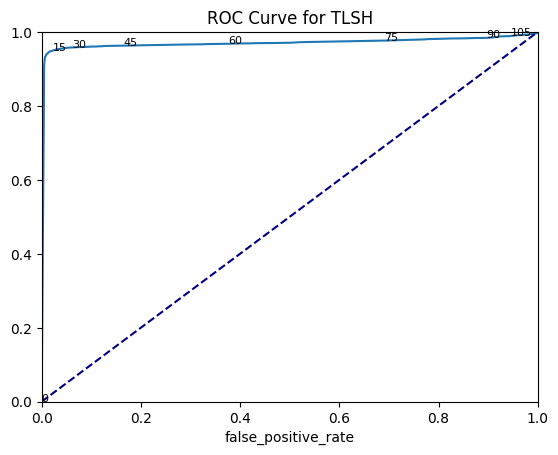

In [20]:
p.plot(x="false_positive_rate", y="true_positive_rate", xlim=(0, 1), ylim=(0, 1),title="ROC Curve for TLSH", legend=False)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
for i in range(0,p.shape[0] - 1, 15):
    plt.annotate(i, (p["false_positive_rate"][i], p["true_positive_rate"][i]), fontsize=8)
    if i > 100:
        break
plt.show()

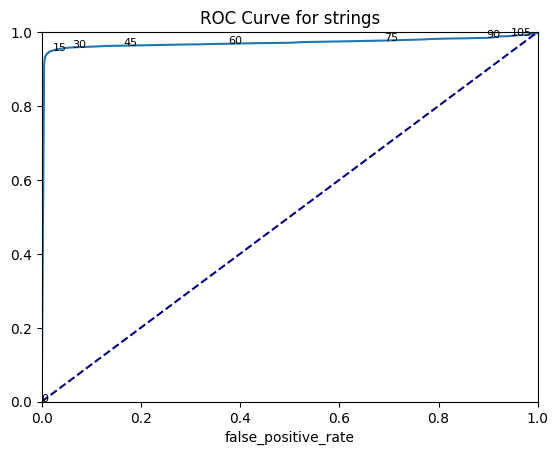

In [21]:
p.plot(x="false_positive_rate", y="true_positive_rate", xlim=(0, 1), ylim=(0, 1),title="ROC Curve for strings", legend=False)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
for i in range(0,p.shape[0] - 1, 15):
    plt.annotate(i, (p["false_positive_rate"][i], p["true_positive_rate"][i]), fontsize=8)
    if i > 100:
        break
plt.show()

<Axes: title={'center': 'F1 Score and Accuracy for TLSH'}, xlabel='threshold'>

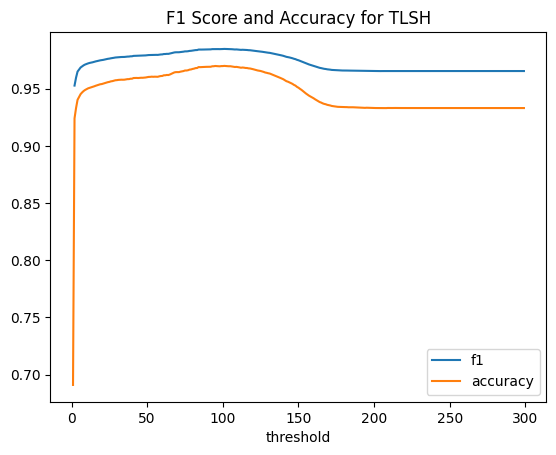

In [22]:
def tlsh_f1(s):
    ssdeep_th = pd.DataFrame(columns=["threshold", "f1", "accuracy"])
    comp_to_sci = s[s["Scicore 1"] == False]
    compt_to_malware = s[s["Scicore 2"] == True]
    for i in range (1,300,1):
        
        sci_th = comp_to_sci[comp_to_sci["Diff Score"] < i]
        mal_th = compt_to_malware[compt_to_malware["Diff Score"] < i]
        f_th = compt_to_malware[compt_to_malware["Diff Score"] >= i]
        
        TP = (sci_th["Family 1"] == sci_th["Family 2"]).sum()
        FP = (sci_th["Family 1"] != sci_th["Family 2"]).sum()
        FN = (f_th["Family 1"] != f_th["Family 2"]).sum()
        TN = (f_th["Family 1"] == f_th["Family 2"]).sum()
        
        precision = TP / (TP + FP) if TP + FP != 0 else 0
        recall = TP / (TP + FN) if TP + TN != 0 else 0
        
        f1 = (2 * precision * recall) / (precision + recall)
        accuracy = (TP + TN) / (TP + FP + FN + TN)
        # Append results to DataFrame
        ssdeep_th.loc[i] = [i, f1, accuracy]
    return ssdeep_th
f = tlsh_f1(tlsh_best)
f.plot(x="threshold", y=["f1","accuracy"],title="F1 Score and Accuracy for TLSH")

In [23]:
ssdeep_best = pd.read_csv("../miniHPC/ssdeep_results.csv")
s = ssdeep_best
size = s.shape[0]
s = s[s["Scicore 2"] == False]
(s["Family 1"] == s["Family 2"]).value_counts()

True     85302
False      476
Name: count, dtype: int64

<Axes: title={'center': 'ROC Curve for ssdeep'}, xlabel='false_positive_rate'>

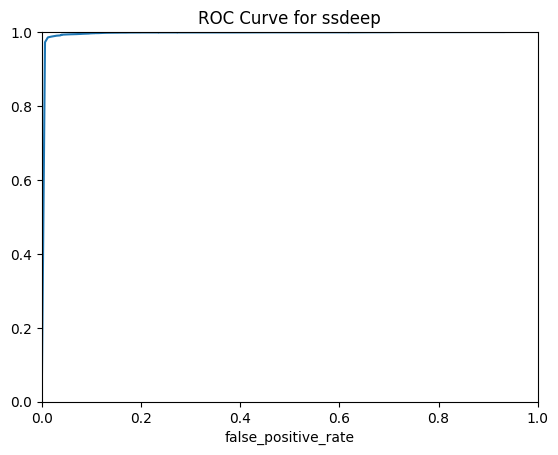

In [24]:
def ssdeep_thresh(s):

    ssdeep_th = pd.DataFrame(columns=["threshold", "true_positive_rate", "false_positive_rate"])
    comp_to_sci = s[s["Scicore 1"] == False]
    compt_to_malware = s[s["Scicore 2"] == True]
    for i in range (0,110,1):
        
        sci_th = comp_to_sci[comp_to_sci["Diff Score"] >= i]
        mal_th = compt_to_malware[compt_to_malware["Diff Score"] > i]
        f_th = compt_to_malware[compt_to_malware["Diff Score"] < i]
        
        TP = (sci_th["Family 1"] == sci_th["Family 2"]).sum()
        FP = (sci_th["Family 1"] != sci_th["Family 2"]).sum()
        FN = (f_th["Family 1"] != f_th["Family 2"]).sum()
        TN = (f_th["Family 1"] == f_th["Family 2"]).sum()
        
        TPR = TP / (TP + FN) if TP + FN != 0 else 0
        FPR = FP / (FP + TN) if FP + TN != 0 else 0
        # Append results to DataFrame
        ssdeep_th.loc[i] = [i, TPR, FPR]
    return ssdeep_th
p = ssdeep_thresh(ssdeep_best)
p.plot(x="false_positive_rate", y="true_positive_rate", xlim=(0, 1), ylim=(0, 1),title="ROC Curve for ssdeep", legend=False)

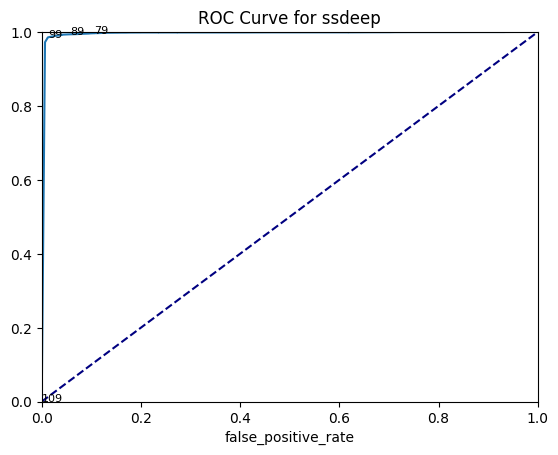

In [25]:
# Plot the ROC curve in range 0.1 to 1.0
ax = p.plot(x="false_positive_rate", y="true_positive_rate", xlim=(0, 1), ylim=(0, 1),title="ROC Curve for ssdeep", legend=False)
for i in range(p.shape[0]- 1,0, -10):
    plt.annotate(i, (p["false_positive_rate"][i], p["true_positive_rate"][i]), fontsize=8)
    if i < 80:
        break
# add a dotet line with y = x for comparison
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.show()

In [26]:
print(f'The optimal Threshold is: {(p["true_positive_rate"] - p["false_positive_rate"]).abs().idxmax()}')

The optimal Threshold is: 98


<Axes: title={'center': 'F1 Score and Accuracy for ssdeep'}, xlabel='threshold'>

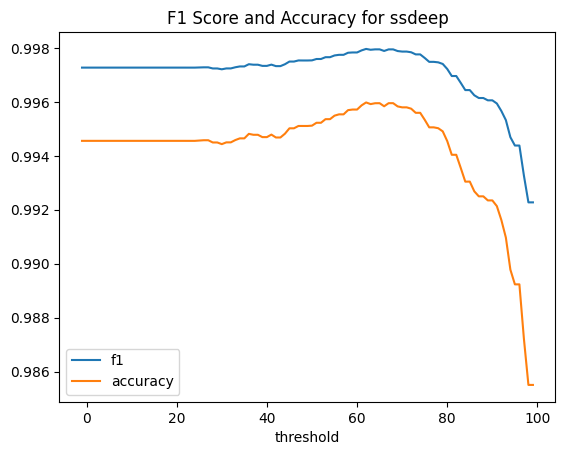

In [27]:
def ssdeep_f1(s):

    ssdeep_th = pd.DataFrame(columns=["threshold", "f1", "accuracy"])
    comp_to_sci = s[s["Scicore 1"] == False]
    compt_to_malware = s[s["Scicore 2"] == True]
    for i in range (-1,100,1):
        
        sci_th = comp_to_sci[comp_to_sci["Diff Score"] >= i]
        mal_th = compt_to_malware[compt_to_malware["Diff Score"] > i]
        f_th = compt_to_malware[compt_to_malware["Diff Score"] < i]
        
        TP = (sci_th["Family 1"] == sci_th["Family 2"]).sum()
        FP = (sci_th["Family 1"] != sci_th["Family 2"]).sum()
        FN = (f_th["Family 1"] != f_th["Family 2"]).sum()
        TN = (f_th["Family 1"] == f_th["Family 2"]).sum()
        
        TPR = TP / (TP + FN) if TP + FN != 0 else 0
        FPR = FP / (FP + TN) if FP + TN != 0 else 0
        # Append results to DataFrame
        precision = TP / (TP + FP) if TP + FP != 0 else 0
        recall = TP / (TP + FN) if TP + TN != 0 else 0
        
        f1 = (2 * precision * recall) / (precision + recall)
        accuracy = (TP + TN) / (TP + FP + FN + TN)
        # Append results to DataFrame
        ssdeep_th.loc[i] = [i, f1, accuracy]
    return ssdeep_th
p = ssdeep_f1(ssdeep_best)
p.plot(x="threshold", y=["f1","accuracy"],title="F1 Score and Accuracy for ssdeep")

In [28]:
tlsh_comp = tlsh_best

tlsh_comp_diff = tlsh_comp[tlsh_comp["Diff Score"] < 400]
tlsh_comp_diff = tlsh_comp_diff[tlsh_comp_diff["Scicore 1"] == False]


ssdeep_comp_diff = ssdeep_best[ssdeep_best["Diff Score"] > 0]

(ssdeep_comp_diff["Family 1"] == ssdeep_comp_diff["Family 2"]).sum() / len(ssdeep_comp_diff)

0.9875225614062623

In [29]:
len(ssdeep_comp_diff) / len(ssdeep_best)

0.8048162116318097

In [30]:
intersect = set(tlsh_comp_diff["Family 1"]) & set(ssdeep_comp_diff["Family 1"])
union = set(tlsh_comp_diff["Family 1"]) | set(ssdeep_comp_diff["Family 1"])
len(union - intersect) / len(union)


0.5769764216366158

In [31]:
tlsh_comp = tlsh_best
#ssdeep_comp = results_ssdeep.loc[results_ssdeep.groupby('ssdeep 1')["Diff Score"].idxmax()]
strings_comp = strings_best
tls = []
ssd = []
strs = []
for i in range (0,300,10):
    tlsh_comp_diff = tlsh_comp[tlsh_comp["Diff Score"] < i]
    str_comp_diff = strings_comp[strings_comp["Diff Score"] < i]
    tlsh_comp_diff = tlsh_comp_diff[tlsh_comp_diff["Scicore 1"] == False]
    str_comp_diff = str_comp_diff[str_comp_diff["Scicore 1"] == False]
    winrate_tlsh = (tlsh_comp_diff["Family 1"] == tlsh_comp_diff["Family 2"]).sum() / len(tlsh_comp_diff)
    winrate_str = (str_comp_diff["Family 1"] == str_comp_diff["Family 2"]).sum() / len(str_comp_diff)
    total_tlsh = len(tlsh_comp_diff) / len(tlsh_comp)
    total_str = len(str_comp_diff) / len(strings_comp)
    tls.append((winrate_tlsh, 1-winrate_tlsh, total_tlsh,i))
    strs.append((winrate_str, 1-winrate_str, total_str,i))
for j in range (0,100,1):
    ssdeep_comp_diff = ssdeep_best[ssdeep_best["Diff Score"] >= j]
    ssdeep_comp_diff = ssdeep_comp_diff[ssdeep_comp_diff["Scicore 1"] == False]
    winrate = (ssdeep_comp_diff["Family 1"] == ssdeep_comp_diff["Family 2"]).sum() / len(ssdeep_comp_diff)
    total = len(ssdeep_comp_diff) / len(ssdeep_best)
    ssd.append((winrate, 1-winrate, total,j))

<Figure size 640x480 with 0 Axes>

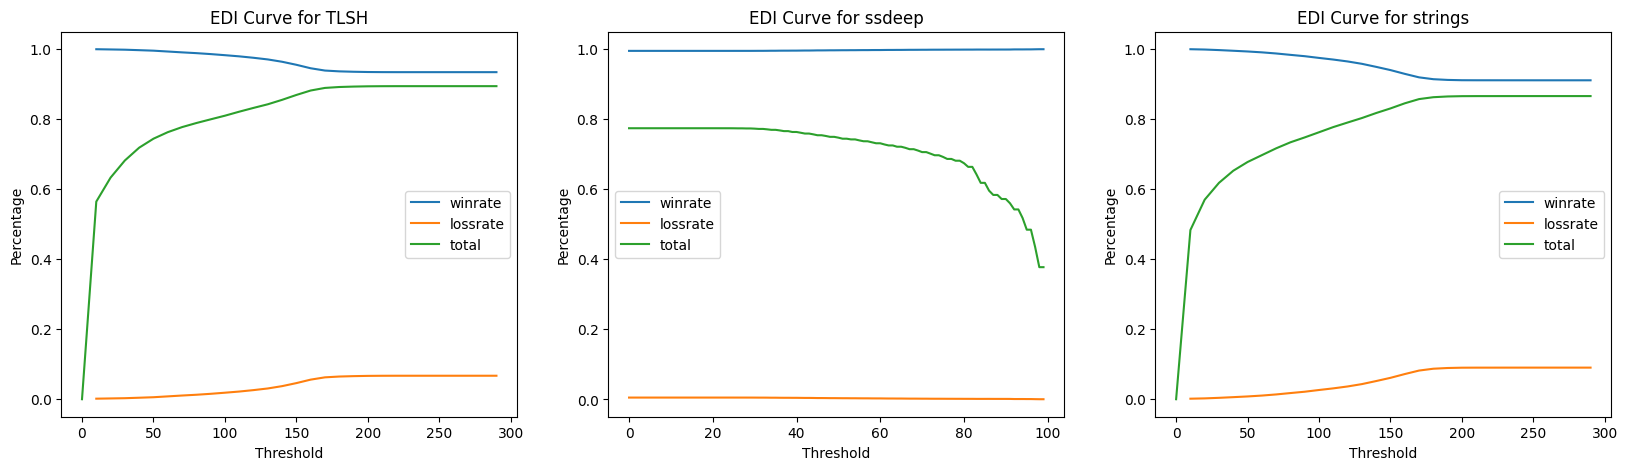

In [32]:
titi = pd.DataFrame(tls, columns=["winrate", "lossrate", "total", "threshold"])
sisi = pd.DataFrame(ssd, columns=["winrate", "lossrate", "total", "threshold"])
stsr = pd.DataFrame(strs, columns=["winrate", "lossrate", "total", "threshold"])

plt.clf()
fig, ax = plt.subplots(1,3, figsize=(20,5))
ax[0].plot(titi["threshold"], titi["winrate"], label="winrate")
ax[0].plot(titi["threshold"], titi["lossrate"], label="lossrate")
ax[0].plot(titi["threshold"], titi["total"], label="total")
ax[0].legend()
ax[0].set_title("EDI Curve for TLSH")
ax[0].set_xlabel("Threshold")
ax[0].set_ylabel("Percentage")
ax[1].plot(sisi["threshold"], sisi["winrate"], label="winrate")
ax[1].plot(sisi["threshold"], sisi["lossrate"], label="lossrate")
ax[1].plot(sisi["threshold"], sisi["total"], label="total")
ax[1].legend()
ax[1].set_title("EDI Curve for ssdeep")
ax[1].set_xlabel("Threshold")
ax[1].set_ylabel("Percentage")
ax[2].plot(stsr["threshold"], stsr["winrate"], label="winrate")
ax[2].plot(stsr["threshold"], stsr["lossrate"], label="lossrate")
ax[2].plot(stsr["threshold"], stsr["total"], label="total")
ax[2].legend()
ax[2].set_title("EDI Curve for strings")
ax[2].set_xlabel("Threshold")
ax[2].set_ylabel("Percentage")
plt.show()